In [1]:
import sys

import scipy.stats
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

sys.path.insert(0, '../src')
from visualization import predictive_viz as viz

%matplotlib inline

/Users/timothyb0912/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


/Users/timothyb0912/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


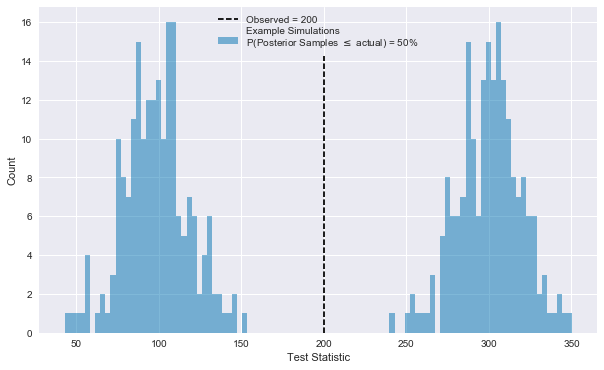

In [2]:
# Generate distributions for the plot
normal_1 = scipy.stats.norm(loc=100, scale=20)
normal_2 = scipy.stats.norm(loc=300, scale=20)

# Set a random seed for reproductibility
np.random.seed(281)

# Generate data for the example histogram
example_data = np.empty((400,))
example_data[:200] = normal_1.rvs(size=(200,))
example_data[200:] = normal_2.rvs(size=(200,))

# Create an example observed value
obs_value = 200

# Choose a color for the histogram bins
bin_color = sbn.color_palette('colorblind')[0]

# Create a figure and axis for the plot
fig, ax = plt.subplots(1, figsize=(10, 6))

# Create a label for the bins
post_p_msg = '\nP(Posterior Samples ' + r'$\leq$ actual) = {:.0%}'
post_p_val = (example_data < obs_value).mean()
bin_label = ('Example Simulations' +
             post_p_msg.format(post_p_val))

# Plot the histogram
viz._plot_predictive_counts(example_data, bin_color, bin_label, ax)

# Plot an example observed value
min_y, max_y = ax.get_ylim()
line_label = ('Observed = {:,.0f}')
ax.vlines(obs_value,
          min_y,
          0.85 * max_y,
          linestyle='dashed',
          label=line_label.format(obs_value))

# Label the figure
ax.set_xlabel('Test Statistic')
ax.set_ylabel('Count')

# Create a legend
ax.legend(loc='best')

# Save the figure
for ext in ['.pdf', '.jpeg']:
    fname = '../reports/figures/example-histogram{}'
    fig.savefig(fname.format(ext), dpi=500, bbox_inches='tight')

# Show the figure
fig.show()